# First laboratory experience 
### Digital Signal Processing (DSP) a.y. 24/25
## 1) Edge detection in images using local variance
Local statistics can determine the gradient of the image. The local variance can be used to generate an edge map. In this section we first compute the local variance of an image, then we find the edges by exploiting the local variance. Local variance means that instead of finding variance for the whole
matrix which represent the image, variance is computed based on a small sliding window.

### Solution:

Load the input image and plot it.

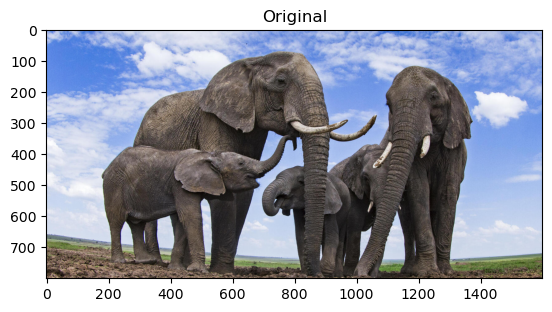

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image 'eleph2.jpg' using OpenCV
imgName='eleph2.jpg'
img = cv2.imread(imgName)

# Plot the original image (in BGR format, so converting to RGB for proper display)
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.show()

Convert the image to grayscale, then to double and plot it.

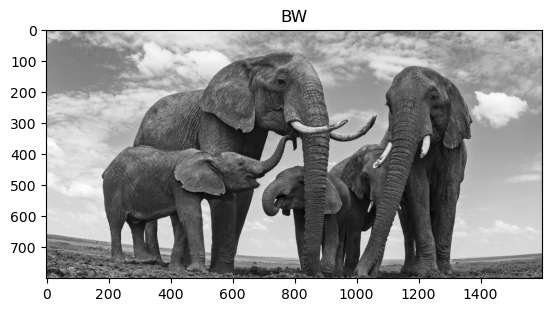

In [54]:
# Convert from RGB to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = img_gray.astype(np.float64)  # Convert to double

# Plot the grayscale image
plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.title("BW")
plt.show()

Define the function *local_mean(image, window_size)* that computes the mean matrix by applying a small sliding window over the image.

In [60]:
def local_mean(image, window_size=3):
    """
    Computes the local mean matrix for an input image using a sliding window approach.

    Parameters:
    -----------
    image : 2D array-like
        The input grayscale image represented as a 2D matrix (rows x columns).
    
    window_size : int
        The size of the sliding window (assumed to be square). For example, 
        a `window_size` of 3 would apply a 3x3 window to compute local means.
    
    Returns:
    --------
    mean_matrix : 2D array-like
        A 2D matrix of the same size as `image` where each element represents 
        the mean value of the pixels in the corresponding window.
    """

    ## Better if window_size is not even
    if window_size % 2 == 0:
        window_size += 1
        
    # Define the matrix to contain the result, creating a matrix of zeros with original image size
    mean_matrix = np.zeros_like(image)
    
    # Zero padding
    mn = window_size // 2
    img_padded = np.pad(image, pad_width=mn, mode='constant', constant_values=0)
    
    rows, columns = image.shape

    #Compute local mean
    for i in range(rows):
        for j in range(columns):
            window = img_padded[i:i+window_size,j:j+window_size]
            mean_matrix[i, j] = np.mean(window)

    return mean_matrix

Define the window dimension, for example start with window size 3x3, and compute local mean and variance of the input image, then display local variance matrix.

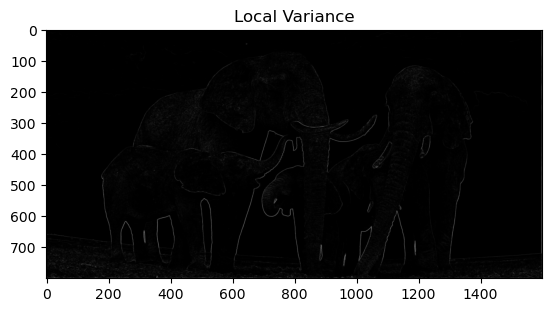

In [56]:
sz = 3

# Compute local variance of the image and save results in matrix defined to contain results
mean_matrix1 = local_mean(img_gray, sz)
mean_matrix2 = local_mean(np.square(img_gray), sz)
local_variance = mean_matrix2 - np.square(mean_matrix1)
# Plot resulting matrix which contains local variance
plt.figure()
plt.imshow(local_variance, cmap='gray')
plt.title("Local Variance")
plt.show()

Define a threshold and apply it to the local variance matrix. The threshold can be set finding the mean of the local variance matrix or can be chosen arbitrarily. Finally show the results.

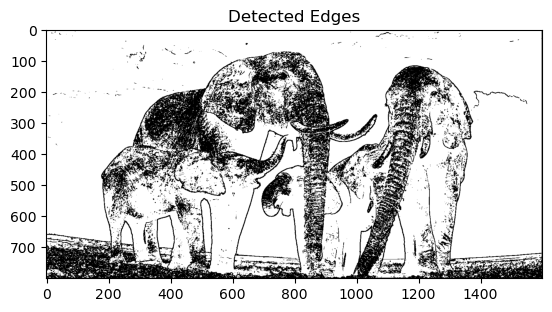

In [59]:
# Define a threshold
threshold = np.mean(local_variance)

# Set the pixel values based on the threshold
edges = np.zeros_like(local_variance)
edges[local_variance < threshold] = 1
edges[local_variance >= threshold] = 0

# Plot detected edges
plt.figure()
plt.imshow(edges, cmap='gray')
plt.title("Detected Edges")
plt.show()
